In [96]:
import numpy as np
from matplotlib import pyplot as plt
#import scipy.signal as signal
import pylab
import pywt
import peakutils
%matplotlib notebook

In [97]:
signals = np.load("../../../Xinzhu_Data/MG09_C.npy")

<IPython.core.display.Javascript object>


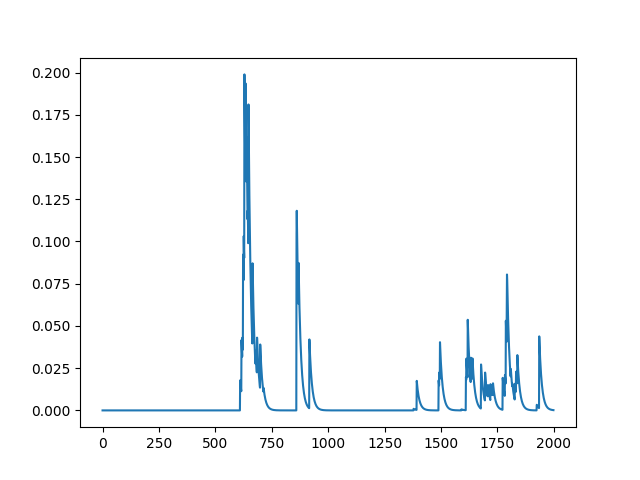

In [111]:
data = signals[65] #65 is good
plt.close()
plt.plot(data)

In [ ]:
widths = np.arange(1,50)

In [112]:
def thresholding_algo(y, lag=5, threshold=5, influence=0.3):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    events_list = [] # [start, end indices]
    cur_event = [0,0] #start, end indices
    in_event = False
    for i in range(lag, len(y)):
        #if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
        #print(stdFilter[i-1])
        if abs(y[i] - avgFilter[i-1]) > threshold:
            if not in_event:
                #print("In event {}".format(i))
                in_event = True
                cur_event[0] = i
                
            '''if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1'''
            signals[i] = 1
            
            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag):i])
            stdFilter[i] = np.std(filteredY[(i-lag):i])
        else:
            if (in_event):
                
                in_event = False
                cur_event[1] = i
                #print("Event ended. Cur event: {}".format(cur_event))
                b = list(cur_event)
                events_list.append(b)
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag):i])
            stdFilter[i] = np.std(filteredY[(i-lag):i])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter),
               events = events_list)

In [ ]:
#result1 = thresholding_algo(data, lag=10, threshold=0.01, influence=0.5)

In [ ]:
#plt.plot(result1['signals'])
#plt.plot(data)

In [ ]:
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(data, widths, 'cgau1')
#plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
#plt.show() 

In [ ]:
freqs[7]

In [ ]:
pywt.wavelist()

In [ ]:
plt.close()
plt.plot(data)
#plt.plot(np.roll(cwtmatr[6], -10))
plt.plot(cwtmatr[4])

In [113]:
#params
base = peakutils.baseline(data,12)
shift_amt = 5.0
base_shifted = base + shift_amt*(np.abs(np.mean(base)))
lag = 10
bump = 0.01
indexes = peakutils.indexes(data, thres=0.1, min_dist=50) #finds peak indices

In [114]:
events = [] #[start index, peak index, end index]

for peak in indexes:
    #first find left bound, then right bound
    start = peak
    for i in range(peak,0,-1):
        if data[i] <= np.mean(base_shifted[(i-lag):(i+lag)]):
            start = i
            break;
    end = peak
    for j in range(peak,len(data),1):
        if data[j] <= np.mean(base_shifted[(j-lag):(j+lag)]):
            end = j
            break;
    event = [start, peak, end]
    events.append(event)

In [115]:
start_pts = [x[0] for x in events]
end_pts = [x[2] for x in events]

<IPython.core.display.Javascript object>


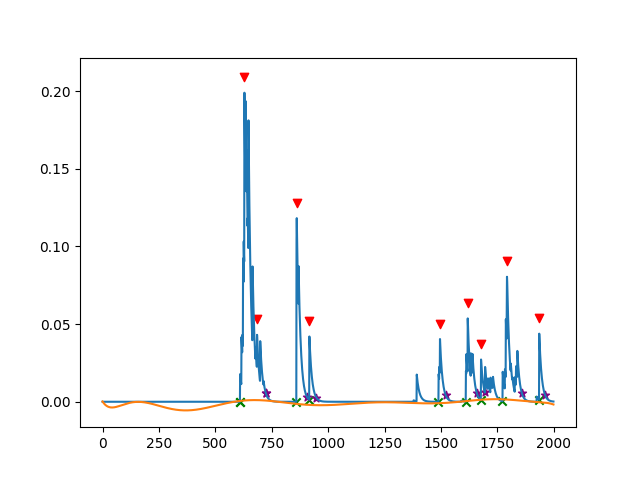

In [116]:
plt.close()
plt.plot(data)
#plt.scatter(np.array(events).flatten(), data[np.array(events).flatten()])
plt.scatter(start_pts, data[start_pts], marker='x', color='green')
plt.scatter(indexes, data[indexes] + bump, marker='v', color='red')
plt.scatter(end_pts, data[end_pts], marker='*', color='purple')
plt.plot(base)

In [ ]:
#plt.rcParams['figure.figsize'] = [6.0,4.0]

In [10]:
events

[[1445, 1455, 1544], [1630, 1639, 1801], [1630, 1702, 1801]]

array([1445, 1455, 1544, 1630, 1639, 1801, 1630, 1702, 1801])

In [90]:
np.mean(data)

0.0060492083440553185

In [91]:
np.median(data)

0.00073746612179089528

In [94]:
np.max(data) * 0.1

0.02670017182826856